In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/rudal/OneDrive/Ai/diabetes.csv", index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [3]:
#결측치 확인
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
#컬럼의 값이 0인 컬럼 개수 확인
zero_counts = (df == 0).sum()
print(zero_counts)

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [15]:
#각 컬럼의 평균 값 계산
column_means = df.mean()
print(column_means)

Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64


In [16]:
#컬럼 값이 0인 컬럼을 평균 값으로 대체
for col in df.columns:
    if col != 'Outcome':
        mask = df[col] == 0
        df.loc[mask, col] = column_means[col]
df

C:\Users\rudal\AppData\Local\Temp\ipykernel_15648\2426212801.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '120.89453125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[mask, col] = column_means[col]
C:\Users\rudal\AppData\Local\Temp\ipykernel_15648\2426212801.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '69.10546875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[mask, col] = column_means[col]
C:\Users\rudal\AppData\Local\Temp\ipykernel_15648\2426212801.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '20.536458333333332' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[mask, col] = column_means[col]
C:\Users\rudal\Ap

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148.0,72.0,35.000000,79.799479,33.6,0.627,50.0,1
1,85.0,66.0,29.000000,79.799479,26.6,0.351,31.0,0
8,183.0,64.0,20.536458,79.799479,23.3,0.672,32.0,1
1,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0
0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...
10,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0,0
2,122.0,70.0,27.000000,79.799479,36.8,0.340,27.0,0
5,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0,0


In [17]:
#컬럼의 값이 0인 컬럼 개수 확인
zero_counts = (df == 0).sum()
print(zero_counts)

Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


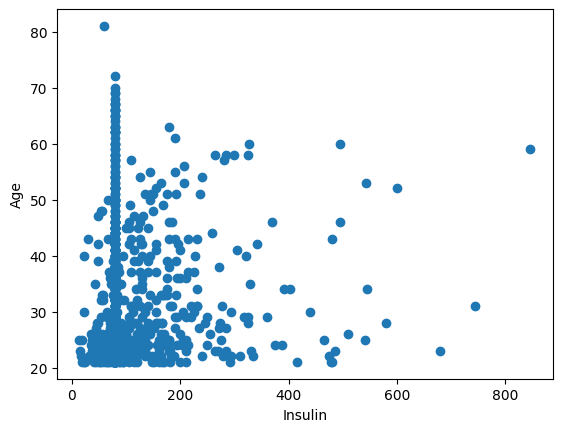

In [18]:
# 산점도 확인

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['Insulin'], df['Age'])
plt.xlabel('Insulin')
plt.ylabel('Age')

plt.show()

C:\Users\rudal\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


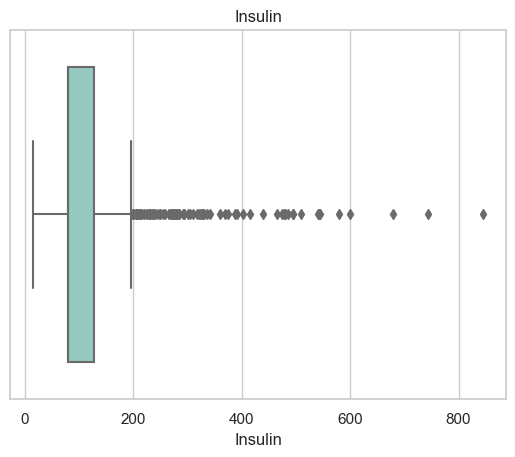

In [19]:
#Boxplot 확
sns.set_theme(style="whitegrid")
sns.boxplot(x="Insulin", data=df, palette="Set3")
plt.title("Insulin")
plt.show()

In [20]:
#Insulin 레이블 개수 확인
label_counts = df['Insulin'].value_counts()
print(label_counts)

Insulin
79.799479     374
105.000000     11
130.000000      9
140.000000      9
120.000000      8
             ... 
73.000000       1
171.000000      1
255.000000      1
52.000000       1
112.000000      1
Name: count, Length: 186, dtype: int64


In [21]:
#DataScaling - Stand
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
print("표준화된 데이터:")
print(scaled_data)

표준화된 데이터:
[[ 0.86527574 -0.0210444   0.87205698 ...  0.46849198  1.4259954
   1.36589591]
 [-1.20598931 -0.51658286  0.2486783  ... -0.36506078 -0.19067191
  -0.73212021]
 [ 2.01597855 -0.68176235 -0.6306536  ...  0.60439732 -0.10558415
   1.36589591]
 ...
 [-0.02240928 -0.0210444  -0.37470037 ... -0.68519336 -0.27575966
  -0.73212021]
 [ 0.14197684 -1.01212132 -0.6306536  ... -0.37110101  1.17073215
   1.36589591]
 [-0.94297153 -0.18622389  0.45647119 ... -0.47378505 -0.87137393
  -0.73212021]]


In [22]:
#DataScaling - MIN-MAX
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)

print("정규화된 데이터:")
print(normalized_data)

정규화된 데이터:
[[0.67096774 0.48979592 0.30434783 ... 0.23441503 0.48333333 1.        ]
 [0.26451613 0.42857143 0.23913043 ... 0.11656704 0.16666667 0.        ]
 [0.89677419 0.40816327 0.14713542 ... 0.25362938 0.18333333 1.        ]
 ...
 [0.49677419 0.48979592 0.17391304 ... 0.07130658 0.15       0.        ]
 [0.52903226 0.36734694 0.14713542 ... 0.11571307 0.43333333 1.        ]
 [0.31612903 0.46938776 0.26086957 ... 0.10119556 0.03333333 0.        ]]


In [23]:
X=df.drop('Outcome',axis=1)
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148.0,72.0,35.000000,79.799479,33.6,0.627,50.0
1,85.0,66.0,29.000000,79.799479,26.6,0.351,31.0
8,183.0,64.0,20.536458,79.799479,23.3,0.672,32.0
1,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0
0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0


In [24]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148.0,72.0,35.000000,79.799479,33.6,0.627,50.0,1
1,85.0,66.0,29.000000,79.799479,26.6,0.351,31.0,0
8,183.0,64.0,20.536458,79.799479,23.3,0.672,32.0,1
1,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0
0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...
10,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0,0
2,122.0,70.0,27.000000,79.799479,36.8,0.340,27.0,0
5,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0,0


In [25]:
y=df['Outcome']
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [28]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.7604166666666666
[[118  12]
 [ 34  28]]


In [29]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.7864583333333334
[[116  14]
 [ 27  35]]


C:\Users\rudal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.6927083333333334
[[101  29]
 [ 30  32]]


In [31]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.7395833333333334
[[103  27]
 [ 23  39]]


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.78125
[[114  16]
 [ 26  36]]
